In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [59]:
asu_pkls = glob.glob('/data/detectors/pkl/2015-06*.pkl')
asu_pkls.sort()
star_dark_pkls = glob.glob('/data/detectors/pkl/2015-07-0*.pkl')
star_dark_pkls.sort()
star_led_pkls = glob.glob('/data/detectors/pkl/2015-07-1[23]*.pkl') #different resonator freqs were used on 2015-07-10
star_led_pkls.sort()
star_led2_pkls = glob.glob('/data/detectors/pkl/2015-07-10*.pkl') #different resonator freqs were used on 2015-07-10
star_led2_pkls.sort()


In [36]:
star_led_pkls

['/data/detectors/pkl/2015-07-12_154039_irled.pkl',
 '/data/detectors/pkl/2015-07-13_120105_irled.pkl',
 '/data/detectors/pkl/2015-07-13_132355_irled.pkl']

In [9]:
import kid_readout.analysis.archive
reload(kid_readout.analysis.archive)

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:923: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


<module 'kid_readout.analysis.archive' from '/home/gjones/readout/kid_readout/kid_readout/analysis/archive.pyc'>

In [37]:
asu = kid_readout.analysis.archive.build_simple_archive(asu_pkls)
star_dark = kid_readout.analysis.archive.build_simple_archive(star_dark_pkls)
star_led = kid_readout.analysis.archive.build_simple_archive(star_led_pkls)

In [60]:
star_led2 = kid_readout.analysis.archive.build_simple_archive(star_led2_pkls)

In [63]:
star=star_dark

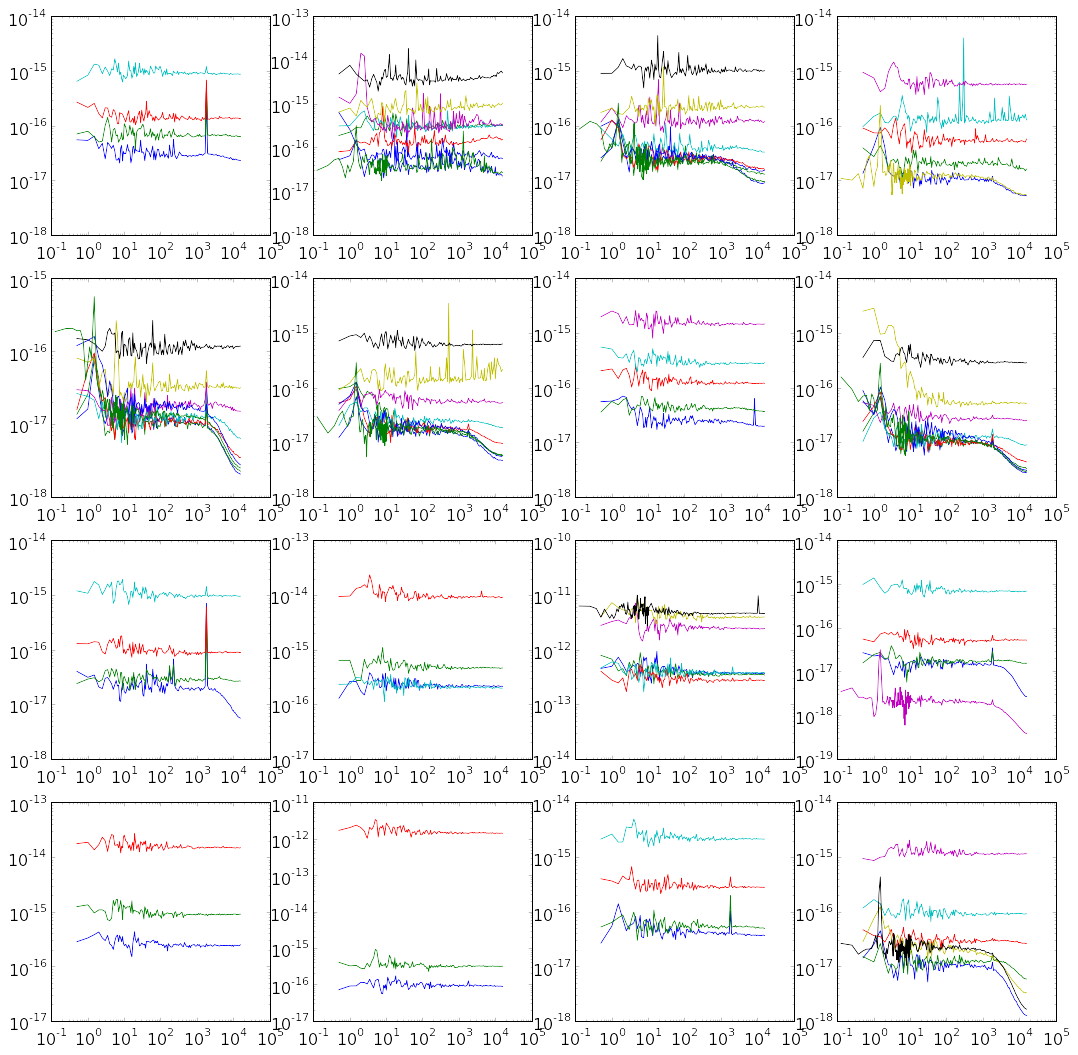

In [11]:
dd = asu[(asu.atten==0) & (asu.a.isnull())]
fig,axs = subplots(4,4,figsize=(18,18))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    for m,row in group.iterrows():
        ax.loglog(row.pca_freq,row.pca_eigvals[1,:])

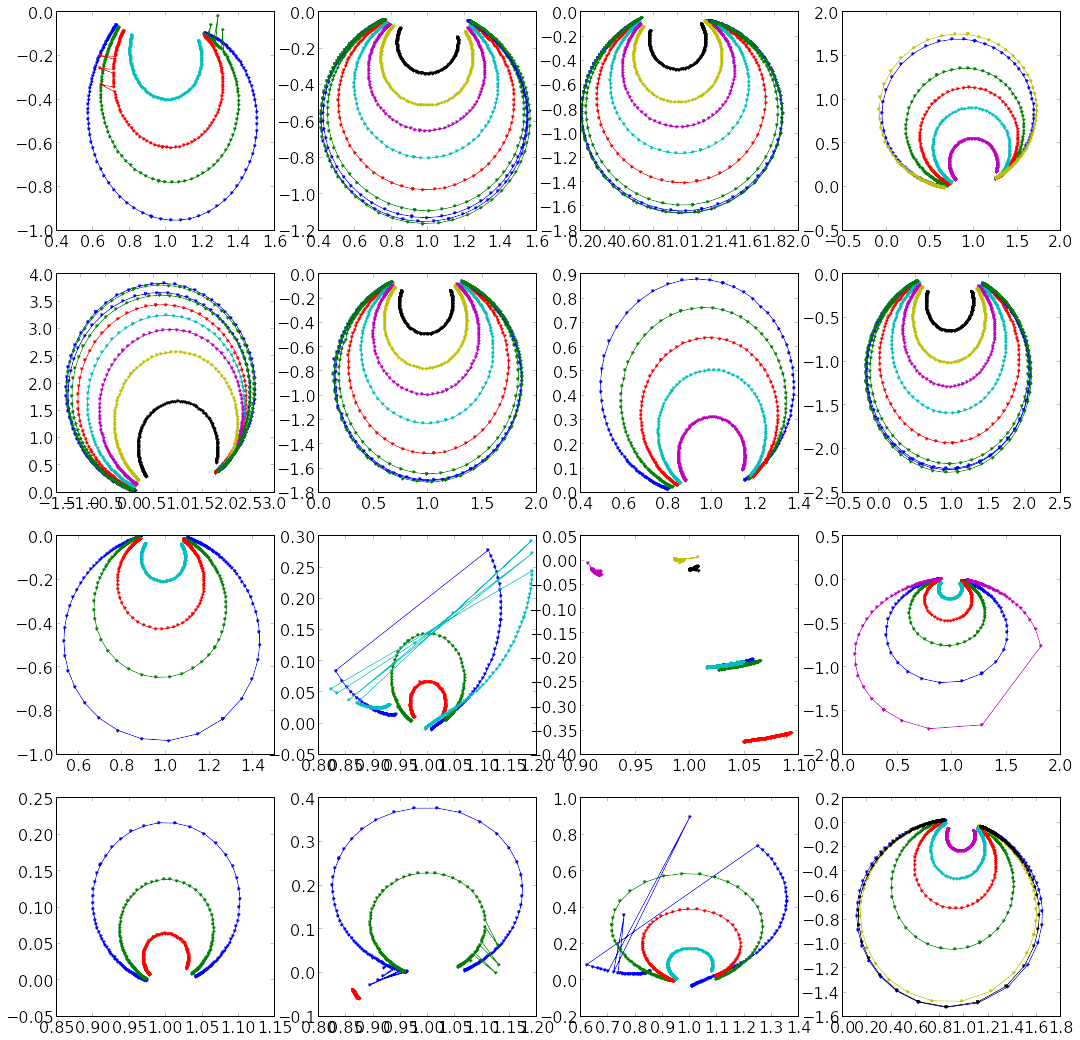

In [12]:
dd = asu[(asu.atten==0) & (asu.a.isnull())]
fig,axs = subplots(4,4,figsize=(18,18))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    for m,row in group.iterrows():
        ax.plot(row.sweep_normalized_s21.real,row.sweep_normalized_s21.imag,'.-')

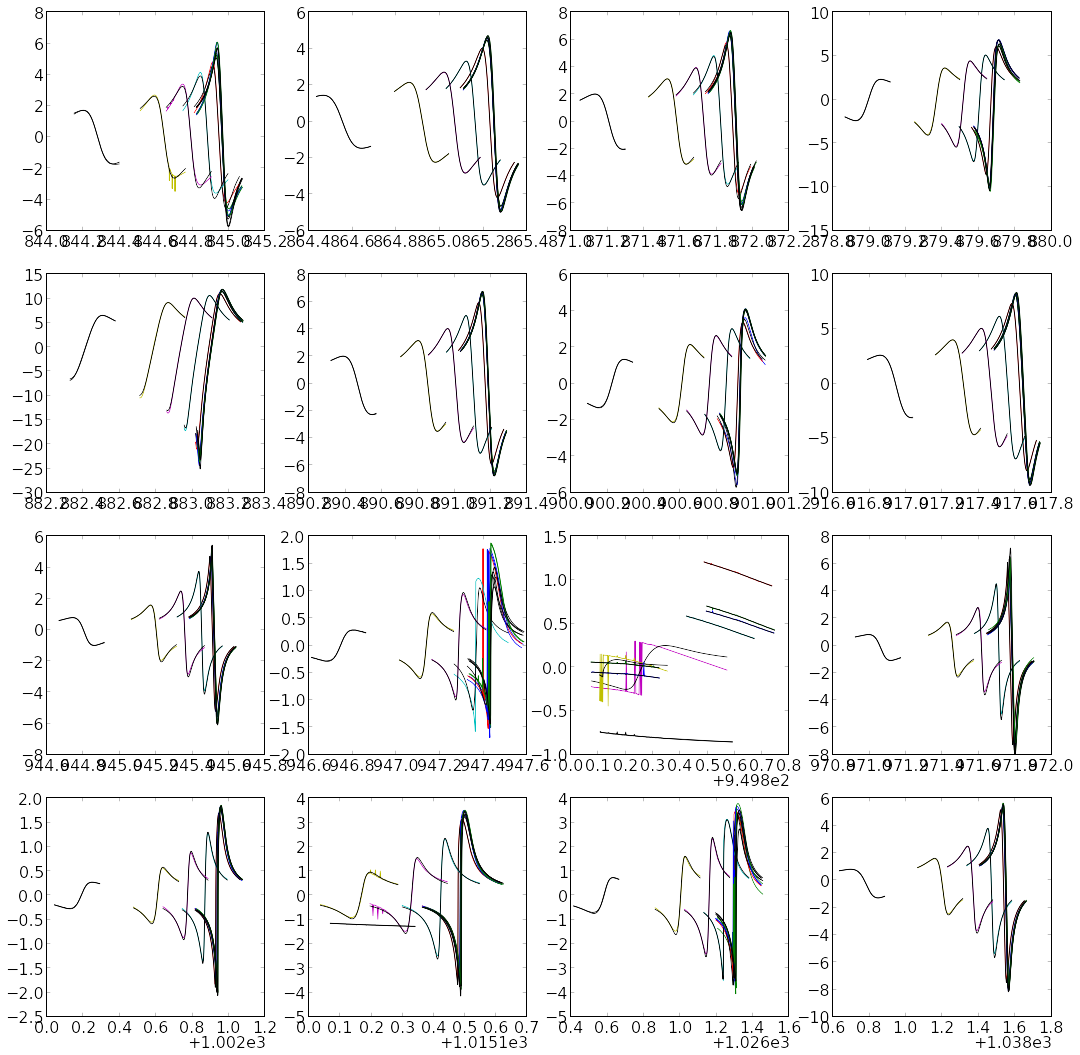

In [13]:
dd = asu[(asu.atten==0)]# & (asu.a.isnull())]
fig,axs = subplots(4,4,figsize=(18,18))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    for m,row in group.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_normalized_s21)))
        ax.plot(row.sweep_model_freqs_MHz,20*np.log10(np.abs(row.sweep_model_normalized_s21)),'k')

In [14]:
import pandas as pd

In [15]:
import kid_readout.analysis.dataframe
reload(kid_readout.analysis.dataframe)

<module 'kid_readout.analysis.dataframe' from '/home/gjones/readout/kid_readout/kid_readout/analysis/dataframe.pyc'>

In [66]:
kid_readout.analysis.dataframe.add_temperature_groups(asu,debug=True)

found level 0.165 matching 176 data points. Mean of this set: 0.162857823985
912 points remaining
found level 0.215 matching 80 data points. Mean of this set: 0.216439835017
832 points remaining
found level 0.27 matching 80 data points. Mean of this set: 0.270463437732
752 points remaining
found level 0.305 matching 80 data points. Mean of this set: 0.303417948642
672 points remaining
found level 0.325 matching 80 data points. Mean of this set: 0.325035139309
592 points remaining
found level 0.345 matching 80 data points. Mean of this set: 0.346793963409
512 points remaining
found level 0.38 matching 80 data points. Mean of this set: 0.379208300631
432 points remaining
found level 0.11 matching 160 data points. Mean of this set: 0.1094287542
272 points remaining
found level 0.175 matching 272 data points. Mean of this set: 0.173304955765
0 points remaining


[0.16500000000000001,
 0.215,
 0.27000000000000002,
 0.30499999999999999,
 0.32500000000000001,
 0.34500000000000003,
 0.38,
 0.11,
 0.17500000000000002]

In [61]:
kid_readout.analysis.dataframe.add_temperature_groups(star_dark,debug=True,temperature_deviation_K=10e-3)
kid_readout.analysis.dataframe.add_temperature_groups(star_led,debug=True,temperature_deviation_K=10e-3)
kid_readout.analysis.dataframe.add_temperature_groups(star_led2,debug=True,temperature_deviation_K=10e-3)

found level 0.13 matching 320 data points. Mean of this set: 0.130908384996
2816 points remaining
found level 0.22 matching 256 data points. Mean of this set: 0.216365397923
2560 points remaining
found level 0.27 matching 256 data points. Mean of this set: 0.270470691785
2304 points remaining
found level 0.33 matching 256 data points. Mean of this set: 0.325151578536
2048 points remaining
found level 0.35 matching 256 data points. Mean of this set: 0.352312809771
1792 points remaining
found level 0.19 matching 544 data points. Mean of this set: 0.189308948183
1248 points remaining
found level 0.24 matching 256 data points. Mean of this set: 0.243335669361
992 points remaining
found level 0.12 matching 256 data points. Mean of this set: 0.121586092031
768 points remaining
found level 0.17 matching 256 data points. Mean of this set: 0.173147045735
512 points remaining
found level 0.21 matching 256 data points. Mean of this set: 0.205238782067
256 points remaining
found level 0.3 matching

[0.17999999999999999, 0.17000000000000001]

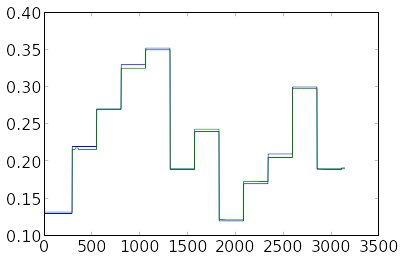

In [18]:
plot(star_dark.sweep_primary_package_temperature_group)
plot(star_dark.sweep_primary_package_temperature)


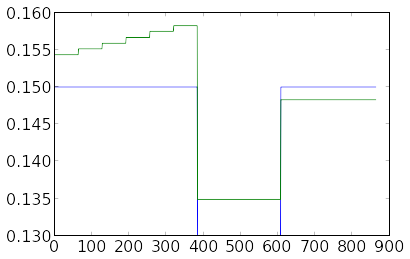

In [39]:
plot(star_led.sweep_primary_package_temperature_group)
plot(star_led.sweep_primary_package_temperature)


In [21]:
star_dark.atten.value_counts()

3     416
30    384
20    384
15    384
13    384
10    384
6     384
0     384
40     32
dtype: int64

In [40]:
star_led.atten.value_counts()

3     544
30     64
15     64
10     64
6      64
0      64
dtype: int64

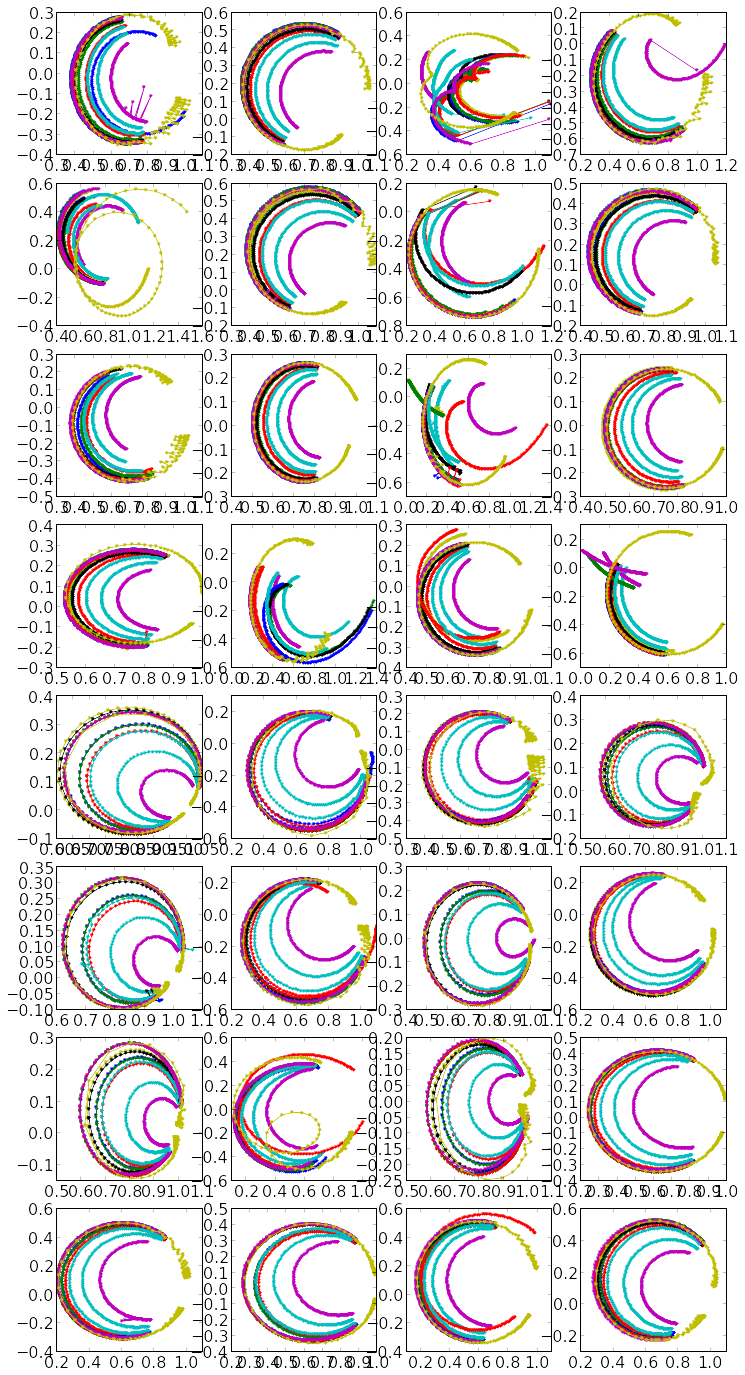

In [23]:
dd = star_dark[star_dark.atten==3]
fig,axs = subplots(8,4,figsize=(12,24))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    for m,row in group.iterrows():
        ax.plot(row.sweep_normalized_s21.real,row.sweep_normalized_s21.imag,'.-')

In [41]:
dd = star_dark[star_dark.atten==3]
fig,axs = subplots(8,4,figsize=(12,24))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    for m,row in group.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_normalized_s21)))
        ax.plot(row.sweep_model_freqs_MHz,20*np.log10(np.abs(row.sweep_model_normalized_s21)),'k')

In [64]:
dd = star_dark[star_dark.atten==3]
fig,axs = subplots(8,4,figsize=(12,24))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    ax.plot(group.f_0,group.Q,'.')

In [69]:
print asu.sweep_primary_package_temperature_group.value_counts()
print star_dark.sweep_primary_package_temperature_group.value_counts()

0.175    272
0.165    176
0.110    160
0.305     80
0.215     80
0.270     80
0.325     80
0.380     80
0.345     80
dtype: int64
0.19    544
0.13    288
0.24    256
0.35    256
0.17    256
0.33    256
0.12    256
0.22    256
0.30    256
0.21    256
0.27    256
dtype: int64


In [84]:
star_dark['Q_c'] = 1/np.real(1/(star_dark.Q_e_real+1j*star_dark.Q_e_imag))

In [85]:
asu['Q_c'] = 1/np.real(1/(asu.Q_e_real+1j*asu.Q_e_imag))

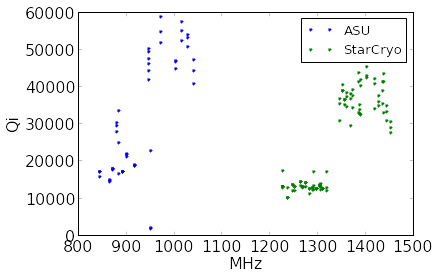

In [97]:
dasu = asu[(asu.atten==10) & (asu.sweep_primary_package_temperature<.18)]
dstar = star_dark[(star_dark.atten==10) & (star_dark.sweep_primary_package_temperature < .18)]
plot(dasu.f_0,dasu.Q,'.')
plot(dstar.f_0,dstar.Q,'r.')
figure()
plot(dasu.f_0,dasu.Q_e_real,'.')
plot(dstar.f_0,dstar.Q_e_real,'.')

figure()
plot(dasu.f_0,np.abs(dasu.Q_e_imag),'.')
plot(dstar.f_0,np.abs(dstar.Q_e_imag),'.')
ylim(0,1e5)
figure()
plot(dasu.f_0,np.abs(dasu.Q_c),'.')
plot(dstar.f_0,np.abs(dstar.Q_c),'.')
plot(dasu.f_0,np.abs(dasu.Q_e_real+1j*dasu.Q_e_imag),'o')
plot(dstar.f_0,np.abs(dstar.Q_e_real+1j*dstar.Q_e_imag),'o')
title('Qc')
ylim(0,1e5)
figure()
plot(dasu.f_0,dasu.Q_i,'.',label='ASU')
plot(dstar.f_0,dstar.Q_i,'.',label='StarCryo')
ylabel('Qi')
xlabel('MHz')
legend(loc='upper right',prop=dict(size='small'))



In [89]:
dd = star_dark[star_dark.atten==3]
fig,axs = subplots(8,4,figsize=(12,24))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    group.sort('sweep_primary_package_temperature',inplace=True)
    ax.plot(group.sweep_primary_package_temperature,group.f_0,'.-')

In [90]:
dd = star_dark[star_dark.atten==3]
fig,axs = subplots(8,4,figsize=(12,24))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    group.sort('sweep_primary_package_temperature',inplace=True)
    ax.plot(group.sweep_primary_package_temperature,1e6/group.Q_i,'.-')

In [92]:
dd = star_dark[star_dark.atten==3]
fig,axs = subplots(8,4,figsize=(12,24))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    group.sort('sweep_primary_package_temperature',inplace=True)
    for k,row in group.iterrows():
        ax.semilogy(row.sweep_primary_package_temperature,np.median(row.pca_eigvals[1,:20]),'ko')

In [26]:
star_led.atten.value_counts()

3     608
30    128
15    128
10    128
6     128
0     128
dtype: int64

In [49]:
star_led.sweep_primary_package_temperature_group.value_counts()

0.15    640
0.13    224
dtype: int64

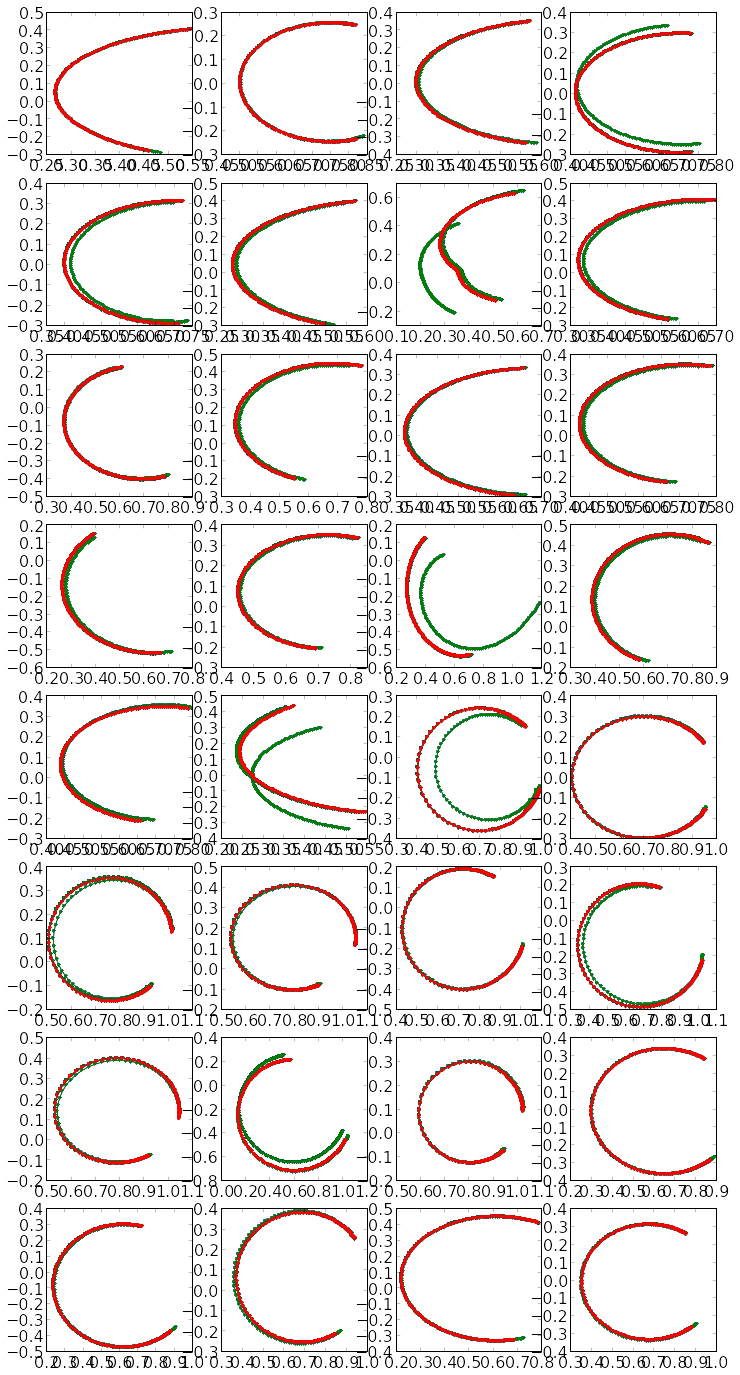

In [42]:
dd = star_led[(star_led.atten==3)]
fig,axs = subplots(8,4,figsize=(12,24))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    for m,row in group.iterrows():
        ax.plot(row.sweep_normalized_s21.real,row.sweep_normalized_s21.imag,'.-')

In [43]:
dd = star_led[(star_led.atten==3)]
fig,axs = subplots(8,4,figsize=(12,24))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    for m,row in group.iterrows():
        ax.plot(row.sweep_freqs_MHz,20*np.log10(np.abs(row.sweep_normalized_s21)))
        ax.plot(row.sweep_model_freqs_MHz,20*np.log10(np.abs(row.sweep_model_normalized_s21)),'k')

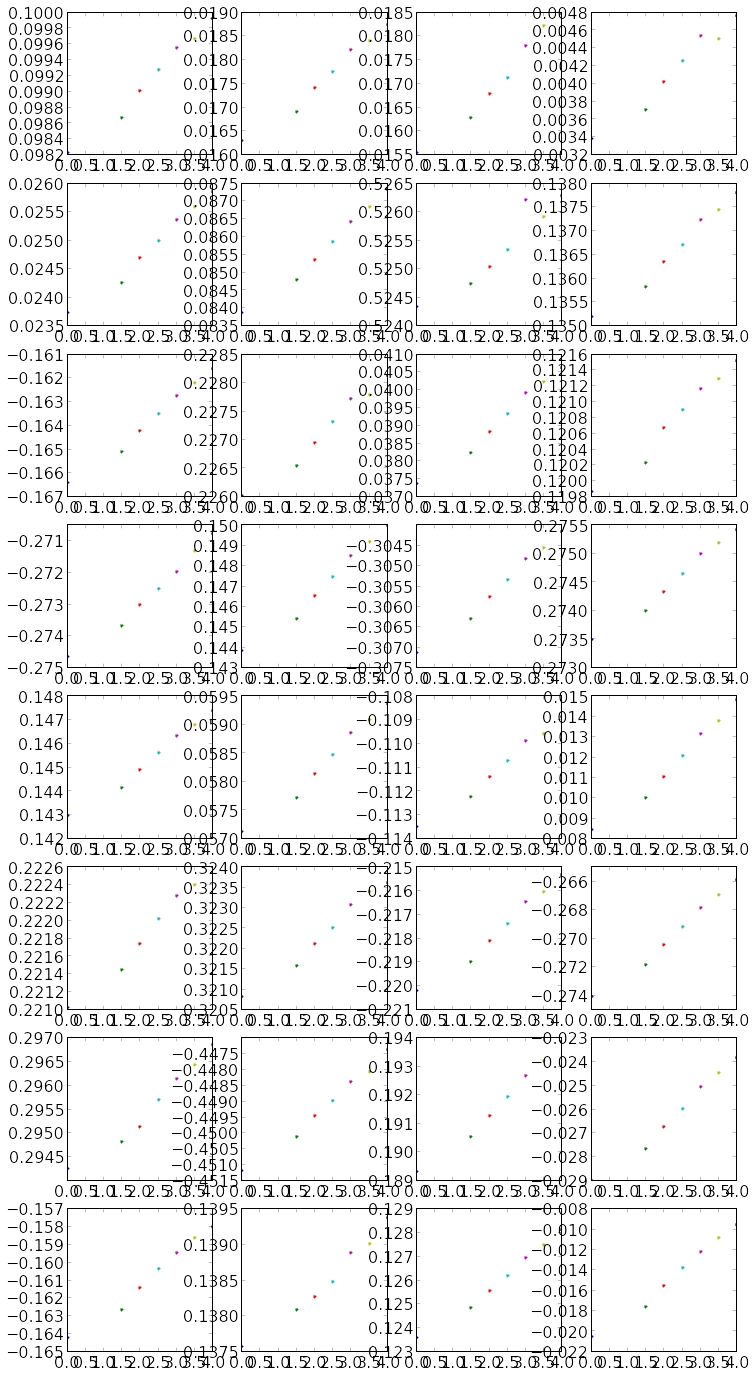

In [57]:
dd = star_led[(star_led.atten==3) & (star_led.sweep_primary_package_temperature_group == .13)]
fig,axs = subplots(8,4,figsize=(12,24))
for k,group in dd.groupby(dd.resonator_id):
    ax = axs.flatten()[k]
    for m,row in group.iterrows():
        ax.plot(row.zbd_voltage,row.low_pass_normalized_timeseries.imag.mean(),'.')
#        ax.plot(row.low_pass_normalized_timeseries.real,row.low_pass_normalized_timeseries.imag,'.')

In [93]:
500./662

0.7552870090634441